# Đồ án cuối kỳ - Lập trình cho khoa học dữ liệu  
Họ và tên: Nguyễn Anh Nam  
MSSV: 1712604

---

## Import

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Lấy dữ liệu

Trong đồ án cuối kỳ, em sử dụng file 'full_grouped.csv' trong bộ COVID-19 Dataset được public trên Kaggle; đây là bộ dữ liệu nói về tổng số trường hợp COVID-19 đã được xác nhận bị nhiễm, tử vong và đã phục hồi từ các quốc gia khác nhau từ ngày 22 tháng 1 năm 2020. Dữ liệu gốc [ở đây](https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv)

---

## Khám phá dữ liệu

In [70]:
covid_df = pd.read_csv('full_grouped.csv')
covid_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


### Số dòng và số cột của dữ liệu

In [71]:
num_rows = covid_df.shape[0]
num_cols = covid_df.shape[1]
print("Số dòng là: {0}\nSố cột là: {1}".format(num_rows, num_cols))

Số dòng là: 35156
Số cột là: 10


### Ý nghĩa của mỗi dòng và mỗi cột:

Mỗi cột được mô tả tác giả mô tả như sau:
- **Country/Region**: Quốc gia hoặc vùng lãnh thổ.
- **Date**: Ngày báo cáo.
- **Confirmed**: Tổng số ca nhiễm đến ngày báo cáo.
- **Deaths**: Tổng số ca chết đến ngày báo cáo.
- **Recovered**: Tổng số ca chữa khỏi đến ngày báo cáo.
- **Active**: Tổng số ca còn lại đến ngày báo cáo.
- **New cases**: Số ca nhiễm tại ngày báo cáo.
- **New deaths**: Số ca chết tại ngày báo cáo.
- **New recovered**: Số ca chữa khỏi tại ngày báo cáo.
- **WHO Region**: Các khu vực của tổ chức y tế thế giới quy định.

Mỗi dòng theo như dữ liệu ta thấy là thông tin về số ca nhiễm, ca tử vong, ca phục hồi tại ngày và khu vực đó.

### Kiểu dữ liệu của mỗi cột:

In [72]:
covid_df.dtypes

Date              object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
Active             int64
New cases          int64
New deaths         int64
New recovered      int64
WHO Region        object
dtype: object

Ta thấy cột "Date" có kiểu dữ liệu là `object` hay kiểu dữ liệu là `str` nhưng trong thực tế `Date` phải có dữ liệu là `Datetime` vì vậy ta phải chuyển kiểu dữ liệu của cột "Date" từ `object` sang `Datetime`.

---

## Tiền xử lí

### Chuyển dtype của cột "Date" sang Datetime

In [73]:
covid_df['Date'] = pd.to_datetime(arg=covid_df['Date'])

In [74]:
covid_df.dtypes

Date              datetime64[ns]
Country/Region            object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
New cases                  int64
New deaths                 int64
New recovered              int64
WHO Region                object
dtype: object

---

## Khám phá dữ liệu

In [75]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


### Khoảng thời gian thu thập dữ liệu

In [76]:
time_range = covid_df['Date'].value_counts().sort_index()
col_range_df = pd.DataFrame({'Date': [time_range.index[0],time_range.index[-1]]}, index=['Min', 'Max'])
col_range_df

,Date
Min,2020-01-22
Max,2020-07-27


---

## Đưa ra các câu hỏi cần trả lời

Sau khi đã biết rõ hơn về dữ liệu, ta thấy có một số câu hỏi có thể trả lời:
- Câu 1: Trong 3 tháng đầu tiên, 10 quốc gia nào có số ca nhiễm Covid cao nhất thế giới?
- Câu 2: Mất bao nhiêu thời gian (đơn vị là ngày) để dịch covid ảnh hưởng đến toàn thế giới (tất cả các nước và khu vực)?
- Câu 3: Trong mỗi tháng, quốc gia nào có số ca chết nhiều nhất?
- Câu 4: Tình trạng dịch bệnh diễn biến như thế nào ở Việt Nam?
- Câu 5: Tình trạng dịch bệnh của nước bị ảnh hưởng nặng nề nhất đến thời điểm hết ngày 27-07-2020 là như thế nào?

---

## Tiền xử lí

Đầu tiên ta phải tiền xử lí bộ dữ liệu lại trước. Vì các câu hỏi đều liên quan đến tháng nên ta thêm cột 'Month' vào dữ liệu.

### Thêm cột 'Month' vào bộ dữ liệu:

In [77]:
covid_df = covid_df.assign(Month = lambda x: x['Date'].dt.month)
covid_df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Month
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,1
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,1
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,1
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,1
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,1


In [78]:
month_range = covid_df['Month'].value_counts().sort_index()

### Miền giá trị của cột 'Month'

In [79]:
col_range_df = col_range_df.join(pd.DataFrame({'Month': [month_range.index[0],
                                                         month_range.index[-1]]}, 
                                              index=['Min', 'Max']))
col_range_df

,Date,Month
Min,2020-01-22,1
Max,2020-07-27,7


---

## Trả lời câu hỏi đã đưa ra:

### Câu 1: Trong 3 tháng đầu tiên, 10 quốc gia nào có số người nhiễm Covid nhiều nhất trên thế giới?

Để trả lời cho câu 1, ta phải thực hiện các bước sau:
- Bước 1: Lọc ra bộ dữ liệu gồm những cột "Date", "Country/Region" và "New cases" mà có tháng thuộc khoảng từ tháng 1 -> 3.
- Bước 2.1: Group by theo cột "Country/Region"
- Bước 2.2: Dùng hàm sum() để lấy ra tổng số ca nhiễm của tất cả các quốc gia/vùng lãnh thổ có trong bộ dữ liệu.
- Bước 3: Sort values theo cột "New cases".
- Bước 4: Đổi tên cột 'New cases' thành 'Confirmed' vì đây không phải là số ca nhiễm mới mỗi ngày nữa, nếu để tên là 'New cases' thì sẽ gây ra sự nhầm lẫn.
- Bước 5: Lấy 5 hàng đầu tiên của dữ liệu thu được ở bước 4.

In [89]:
# Bước 1
three_month_df = covid_df[covid_df["Month"] < col_range_df.loc['Min', 'Month'] + 3]
df = three_month_df[['Date', 'Country/Region', 'New cases']]
# Bước 2
country_df = df.groupby(['Country/Region']).sum()
# Bước 3
country_df.sort_values(by=["New cases"], ascending=False, inplace=True)
# Bước 4
country_df.rename(columns={'New cases': 'Confirmed'}, inplace=True)
# Bước 5
top_countries = country_df.iloc[:10]
top_countries

,Confirmed
Country/Region,
US,188723
Italy,105792
Spain,95923
China,81731
Germany,71808
France,52827
Iran,44605
United Kingdom,38815
Switzerland,16605


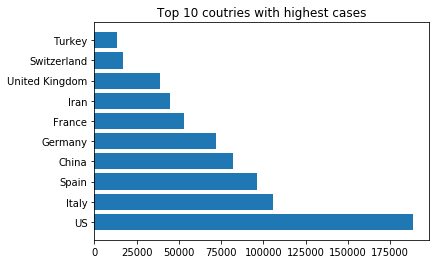

In [90]:
plt.barh(top_countries.index,top_countries['Confirmed'])
plt.title('Top 10 coutries with highest cases');

Qua biểu đồ ta thấy nước Mỹ có số ca nhiễm cao ngất ngưỡng (gần gấp đôi) so với nước đứng thứ nhì về số lượng người nhiễm là nước Ý. Qua đó ta thấy chính sách chống dịch của Mỹ có vấn đề, và lý do khiến Mỹ là tâm dịch lớn nhất trên thế giới chỉ sau 3 tháng là vì:
- Mỗi bang lại có cách chống dịch mỗi kiểu, không thống nhất với nhau. Người dân thì còn chủ quan không chịu cách li xã hội.
- Thiếu hụt thiết bị y tế, ngày càng có nhiều người bị nhiễm Covid 19 nên các bệnh viện ở đây đã bắt đầu quá tải và thiếu hụt thiết bị y tế cũng như nhân lực.

---

### Câu 2: Mất bao nhiêu thời gian (đơn vị là ngày) để dịch covid ảnh hưởng đến toàn thế giới (tất cả các nước và khu vực)?

Ý tưởng để giải quyết câu này:
- Bước 1: Group by dữ liệu theo cột 'Date' và 'Country/Region' và lấy ra cột 'Confirmed' để tính tổng số ca nhiễm của mỗi quốc gia hoặc vùng lãnh thổ tại mỗi ngày.
- Bước 2: Tìm xem ngày đầu tiên mà tất cả các quốc gia đều có ca nhiễm bằng cách unstack dữ liệu ở bước 1 và kiểm tra xem với ngày đó thì có quốc gia nào không có ca nhiễm không? Nếu tất cả quốc gia đều có ca nhiễm thì lưu ngày đó vào biến `covid_date`.
- Bước 3: Tính khoảng thời gian mà toàn cầu đều bị nhiễm covid bằng cách lấy `covid_date - col_range_df.loc['Min', 'Date']` và lưu vào biến `result` 

In [82]:
df = covid_df.groupby(['Date', 'Country/Region'])['Confirmed'].sum().unstack()

covid_date = col_range_df.loc['Min', 'Date']
for date in df.index:
    is_date = True
    for country in df.columns:
        if df.loc[date, country] == 0:
            is_date = False
    if is_date:
        covid_date = date
        break

result = covid_date - col_range_df.loc['Min', 'Date']
result

Timedelta('112 days 00:00:00')

Vậy chỉ sau 112 ngày kể từ ngày đầu tiên trong dữ liệu thì toàn bộ các quốc gia và vùng lãnh thổ trong dữ liệu đã có ca nhiễm covid. Tốc độ lây lang là rất nhanh và qua đó cho thấy sự nguy hiểm của dịch Covid đối với toàn thế giới.

---

### Câu 3: Trong mỗi tháng, quốc gia nào có số ca chết nhiều nhất?

## Tài liệu tham khảo:

https://tuoitre.vn/vi-sao-my-thanh-vung-dich-covid-19-lon-nhat-the-gioi-20200329084219417.htm  
https://pandas.pydata.org/docs/  
https://www.kaggle.com/